# パーセプトロン（Perceptron）

## パーセプトロンの動作原理

In [ ]:
from IPython.display import Image, display_png

display_png(Image('../../static/images/perceptron.png'))


FileNotFoundError: No such file or directory: '../../static/images/perceptron.png'

FileNotFoundError: No such file or directory: '../../static/images/perceptron.png'

## パーセプトロンの数式

$$ y =
\left\{
\begin{array}{ll}
0 & (b + w_1x_1 + w_2x_2 \leqq 0) \\
1 & (b + w_1x_1 + w_2x_2 \gt 0)
\end{array}
\right.
$$

## パーセプトロンの実装

In [2]:
def AND(x1, x2):
    """
    (w1, w2, b) = (0.5, 0.5, -0.7)のようなときに動作する.
    
      x1  x2  |  y  
    ==================
       0   0  |  0
    ------------------
       1   0  |  0
    ------------------
       0   1  |  0
    ------------------
       1   1  |  1
    ------------------
    """
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


def NAND(x1, x2):
    """
    (w1, w2, b) = (-0.5, -0.5, 0.7)のようなときに動作する.
    
      x1  x2  |  y  
    ==================
       0   0  |  1
    ------------------
       1   0  |  1
    ------------------
       0   1  |  1
    ------------------
       1   1  |  0
    ------------------    
    """
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


def OR(x1, x2):
    """
    (w1, w2, b) = (0.5, 0.5, -0.2)のようなときに動作する.
    
      x1  x2  |  y  
    ==================
       0   0  |  0
    ------------------
       1   0  |  1
    ------------------
       0   1  |  1
    ------------------
       1   1  |  1
    ------------------    
    """
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w * x) + b
    if tmp <= 0:
        return 0
    else:
        return 1


## パーセプトロンの可視化

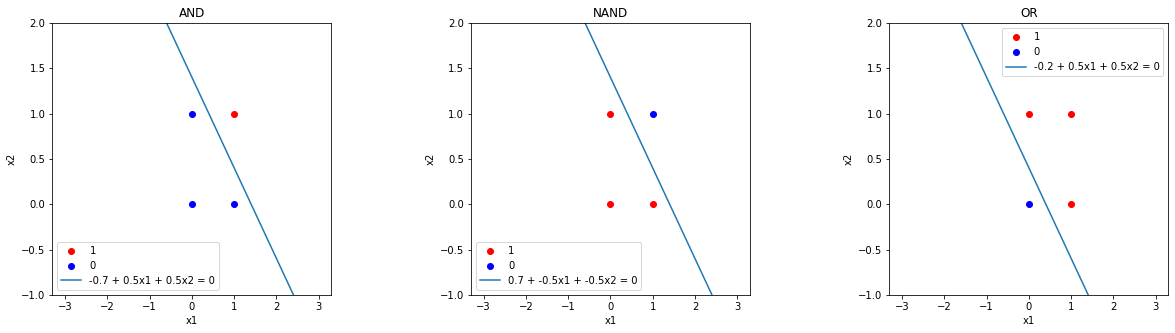

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


class LogicDevice(object):
    """論理回路の真理値をプロットするためのクラス.
    
    b: バイアス
    w1: 重み1
    w2: 重み2
    """
    def __init__(self, func, b, w1, w2):
        self.func = func
        self.b = b
        self.w1 = w1
        self.w2 = w2

    def set_subplot(self, fig, pos):
        """
        fig: figure object
        pos: subplot position (need to input 1 - 3 number)
        """
        # 図の設定
        ax = fig.add_subplot(1, 3, pos)
        ax.set_title(self.func.__name__)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')

        # 決定境界をプロット
        if self.func.__name__ is not 'XOR':
            x1 = np.linspace(-3, 3, 100)
            x2 = (-self.b - self.w1 * x1) / self.w2
            ax.plot(x1, x2, label='{} + {}x1 + {}x2 = 0'.format(self.b, self.w1, self.w2))

        # 特徴量「x1, x2 = (0, 0), (1, 0), (0, 1), (1, 1)」の組み合わせを散布
        ax.scatter(0, 0, c=self.judge_color(0, 0), label=self.func(0, 0))
        ax.scatter(1, 0, c=self.judge_color(1, 0), label=self.func(1, 0))
        ax.scatter(0, 1, c=self.judge_color(0, 1), label=self.func(0, 1))
        ax.scatter(1, 1, c=self.judge_color(1, 1), label=self.func(1, 1))
        ax.set_ylim(-1, 2)

        # 凡例を一つにまとめるだけの処理
        handles, labels = ax.get_legend_handles_labels()
        i = np.arange(len(labels))
        filter = np.array([])
        unique_labels = list(set(labels))
        for ul in unique_labels:
            filter = np.append(filter, [i[np.array(labels) == ul][0]])
        handles = [handles[int(f)] for f in filter]
        labels = [labels[int(f)] for f in filter]
        ax.legend(handles, labels)

    def judge_color(self, x1, x2):
        if self.func(x1, x2) == 1:
            return 'r'

        return 'b'


fig = plt.figure(figsize=(20, 5))

# AND関数「(b, w1, w2) = (0.5, 0.5, -0.7)」、決定境界は「-0.7 + 0.5x1 + 0.5x2 = 0」の直線
and_func = LogicDevice(AND, -0.7, 0.5, 0.5)
and_func.set_subplot(fig, 1)

# NAND関数「(w1, w2, b) = (-0.5, -0.5, 0.7)」、決定境界は「0.7 - 0.5x1 - 0.5x2 = 0」の直線
nand_func = LogicDevice(NAND, 0.7, -0.5, -0.5)
nand_func.set_subplot(fig, 2)

# OR関数「(w1, w2, b) = (0.5, 0.5, -0.2)」、決定境界は「-0.2 + 0.5x1 + 0.5x2 = 0」の直線
or_func = LogicDevice(OR, -0.2, 0.5, 0.5)
or_func.set_subplot(fig, 3)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


## パーセプトロンの限界

In [4]:
from IPython.display import Image, display_png

display_png(Image('../../static/images/xor.png'))


FileNotFoundError: No such file or directory: '../../static/images/xor.png'

FileNotFoundError: No such file or directory: '../../static/images/xor.png'

In [5]:
def XOR(x1, x2):
    """
    AND, NAND, ORを組み合わせることで実装できる.
    
      x1  x2  |  y  
    ==================
       0   0  |  0
    ------------------
       1   0  |  1
    ------------------
       0   1  |  1
    ------------------
       1   1  |  0
    ------------------
    """
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    return AND(s1, s2)


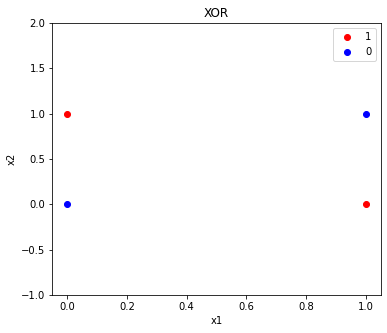

In [6]:
# XOR関数「(w1, w2, b) = (1.0, 1.0, -0.5)」、決定境界は線形でない
fig = plt.figure(figsize=(20, 5))

xor_func = LogicDevice(XOR, 1.0, 1.0, -0.5)
xor_func.set_subplot(fig, 1)

plt.show()


## まとめ

- パーセプトロンでは、「重み」と「バイアス」をパラメータとして設定する（手動で行う必要がある）。
- パーセプトロンを用いれば、ANDやORの論理回路を表現できる。
- 単層のパーセプトロンは線形領域だけでしか表現できないのに対して、多層のパーセプトロンは非線形領域を表現することができる。